<a href="https://colab.research.google.com/github/prajaktacodes/SparksGRIPInternship/blob/main/Task_3_EDA_For_Retail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Author:Prajakta Mayekar**

#Exploratory Data Analysis on Dataset 'SampleSuperstore'


---

**Aim: As a business manager, try to find out the weak areas where you can work to make more profit.**

Exploratory Data Analysis (EDA) is a data science technique that involves analyzing and summarizing datasets to uncover patterns, trends, and insights.

The main advantage of EDA is providing the data visualization of data after conducting the analysis.

# Importing Required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

**Loading the dataset**

In [2]:
df= pd.read_csv("/content/drive/MyDrive/SampleSuperstore.csv")

**Data Exploration/ Understanding**

In [3]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
df.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


**Model Building**

In [5]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [8]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [9]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [10]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [11]:
df = df[['Segment','Ship Mode','City','State','Postal Code','Category','Sub-Category','Sales', 'Quantity', 'Discount','Profit']].copy()
df

,Segment,Ship Mode,City,State,Postal Code,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Consumer,Second Class,Henderson,Kentucky,42420,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Consumer,Second Class,Henderson,Kentucky,42420,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Corporate,Second Class,Los Angeles,California,90036,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Consumer,Standard Class,Fort Lauderdale,Florida,33311,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Consumer,Standard Class,Fort Lauderdale,Florida,33311,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...
9989,Consumer,Second Class,Miami,Florida,33180,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Consumer,Standard Class,Costa Mesa,California,92627,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Consumer,Standard Class,Costa Mesa,California,92627,Technology,Phones,258.5760,2,0.20,19.3932
9992,Consumer,Standard Class,Costa Mesa,California,92627,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [12]:
df.loc[df.duplicated()].shape

(17, 11)

In [14]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True,inplace=True)
df

,Segment,Ship Mode,City,State,Postal Code,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Consumer,Second Class,Henderson,Kentucky,42420,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Consumer,Second Class,Henderson,Kentucky,42420,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Corporate,Second Class,Los Angeles,California,90036,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Consumer,Standard Class,Fort Lauderdale,Florida,33311,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Consumer,Standard Class,Fort Lauderdale,Florida,33311,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...
9972,Consumer,Second Class,Miami,Florida,33180,Furniture,Furnishings,25.2480,3,0.20,4.1028
9973,Consumer,Standard Class,Costa Mesa,California,92627,Furniture,Furnishings,91.9600,2,0.00,15.6332
9974,Consumer,Standard Class,Costa Mesa,California,92627,Technology,Phones,258.5760,2,0.20,19.3932
9975,Consumer,Standard Class,Costa Mesa,California,92627,Office Supplies,Paper,29.6000,4,0.00,13.3200


sales_by_ shipmode


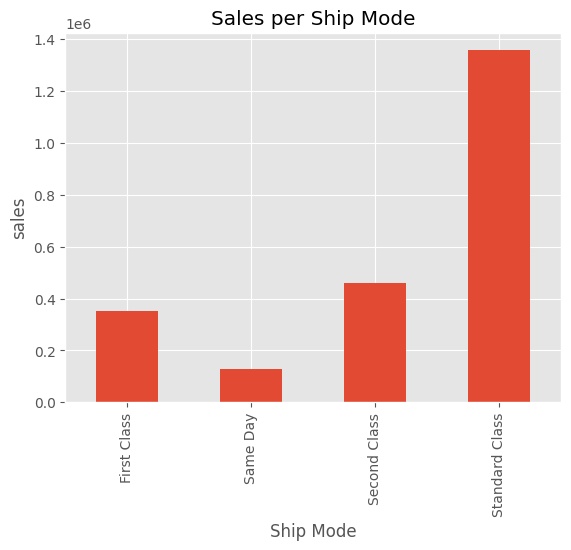

In [15]:
sales_by_shipmode=  df.groupby('Ship Mode')['Sales'].sum()
ax= sales_by_shipmode.plot(kind='bar',title= 'Sales per Ship Mode')
ax.set_xlabel('Ship Mode')
ax.set_ylabel('sales')
print('sales_by_ shipmode')
plt.show()

Ship Mode
First Class        48953.6561
Same Day           15871.8869
Second Class       57446.6516
Standard Class    163969.2280
Name: Profit, dtype: float64


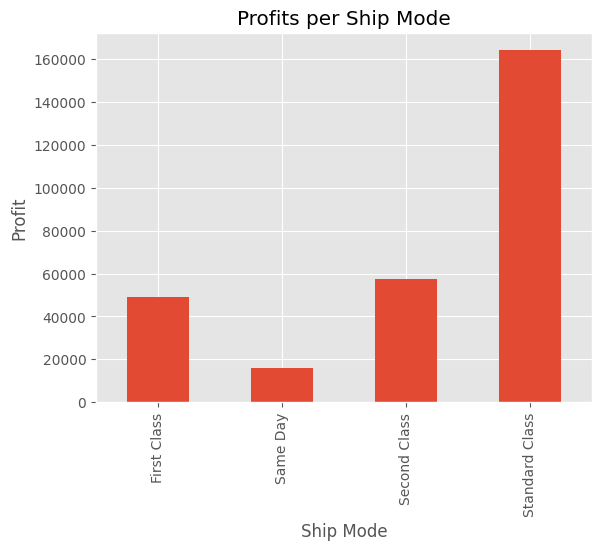

In [16]:
profit_by_shipmode = df.groupby('Ship Mode')['Profit'].sum()
ax = profit_by_shipmode.plot(kind='bar',title='Profits per Ship Mode')
ax.set_xlabel('Ship Mode')
ax.set_ylabel('Profit')
print(profit_by_shipmode)
plt.show()

Ship Mode
First Class        5690
Same Day           1956
Second Class       7418
Standard Class    22756
Name: Quantity, dtype: int64


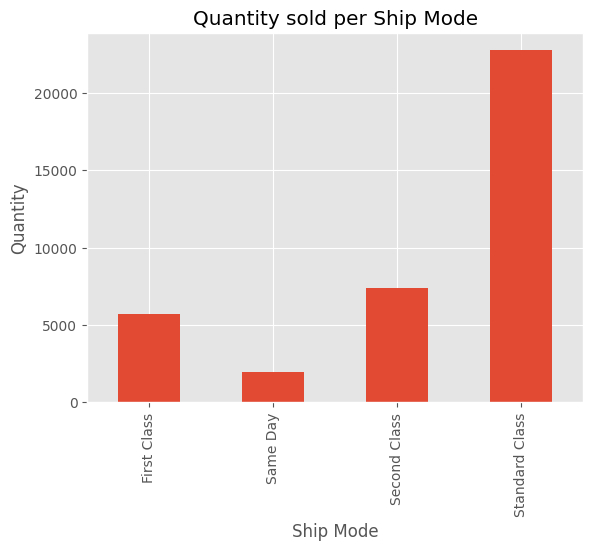

In [17]:
quantity_by_shipmode = df.groupby('Ship Mode')['Quantity'].sum()
ax = quantity_by_shipmode.plot(kind='bar',title='Quantity sold per Ship Mode')
ax.set_xlabel('Ship Mode')
ax.set_ylabel('Quantity')
print(quantity_by_shipmode)
plt.show()

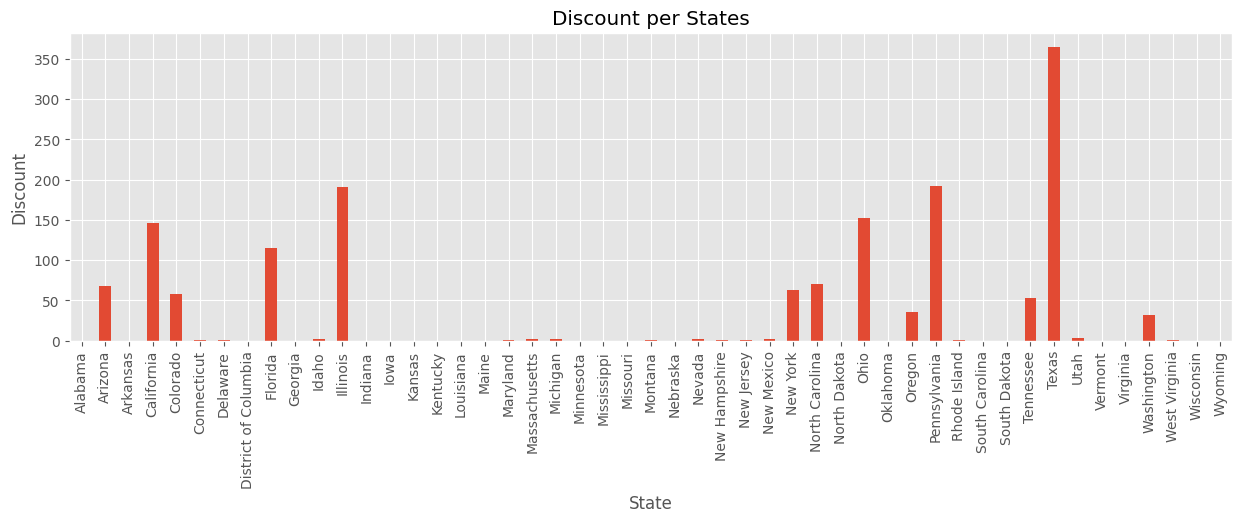

In [18]:
Discount_per_state = df.groupby('State')['Discount'].sum()
dx=Discount_per_state.plot(kind='bar',title='Discount per States',figsize=(15,4))
dx.set_ylabel('Discount')
plt.show()

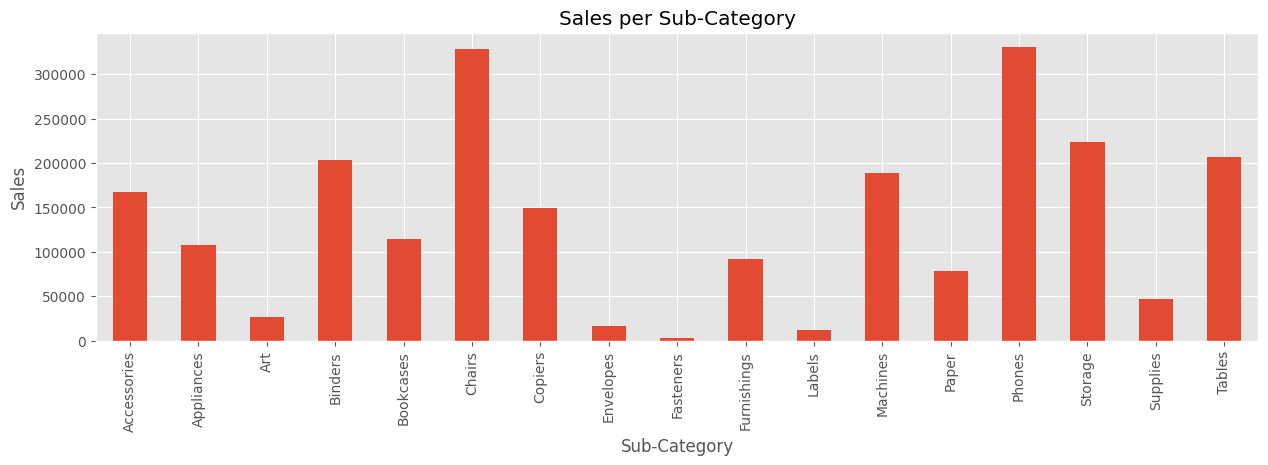

In [19]:
Sales_per_Sub_Category = df.groupby('Sub-Category')['Sales'].sum()
cx=Sales_per_Sub_Category.plot(kind='bar',title='Sales per Sub-Category',figsize=(15,4))
cx.set_ylabel('Sales')
plt.show()

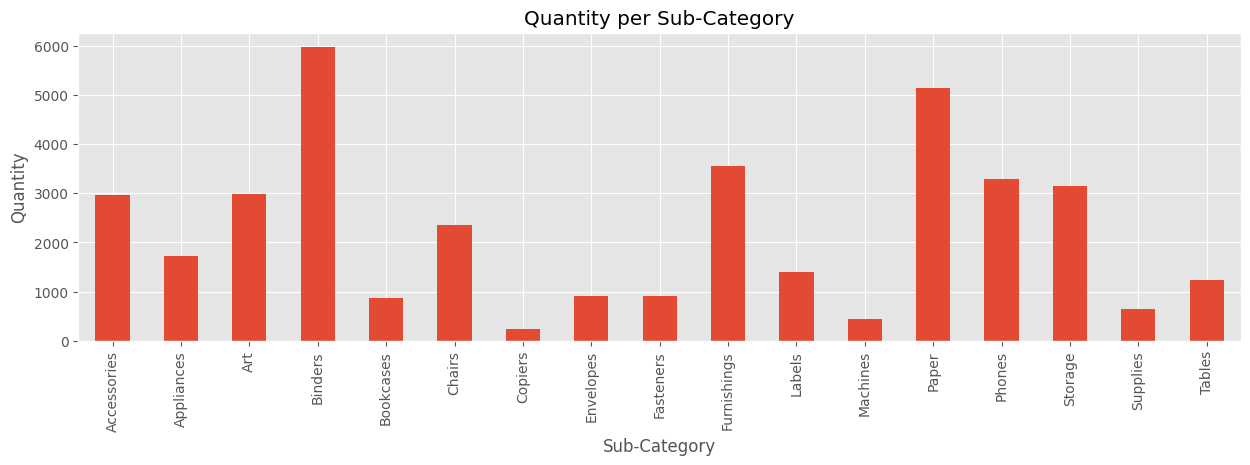

In [20]:
Quantity_per_Sub_Category = df.groupby('Sub-Category')['Quantity'].sum()
cx=Quantity_per_Sub_Category.plot(kind='bar',title='Quantity per Sub-Category',figsize=(15,4))
cx.set_ylabel('Quantity')
plt.show()

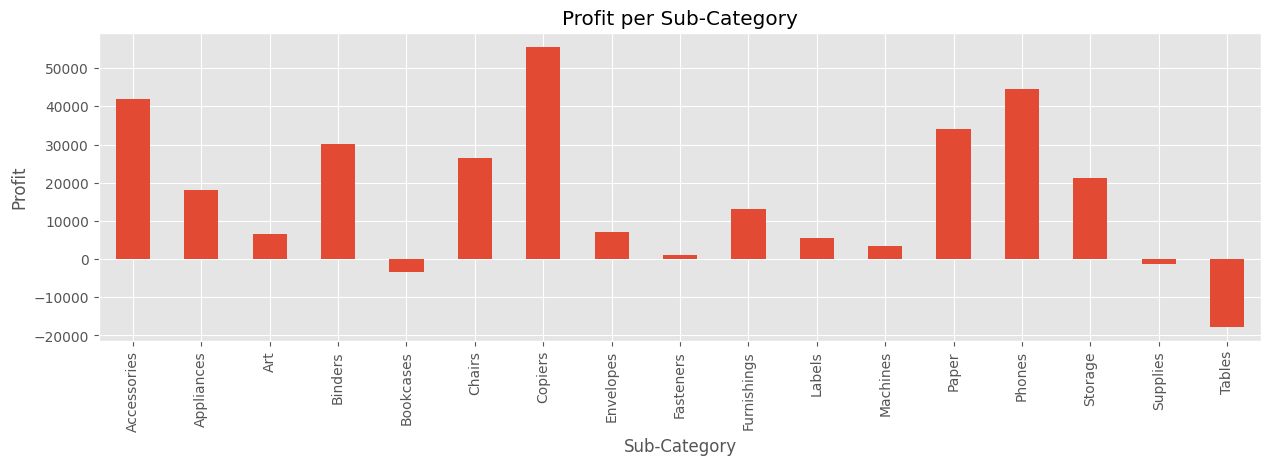

In [21]:
Profit_per_Sub_Category = df.groupby('Sub-Category')['Profit'].sum()
cx=Profit_per_Sub_Category.plot(kind='bar',title='Profit per Sub-Category',figsize=(15,4))
cx.set_ylabel('Profit')
plt.show()

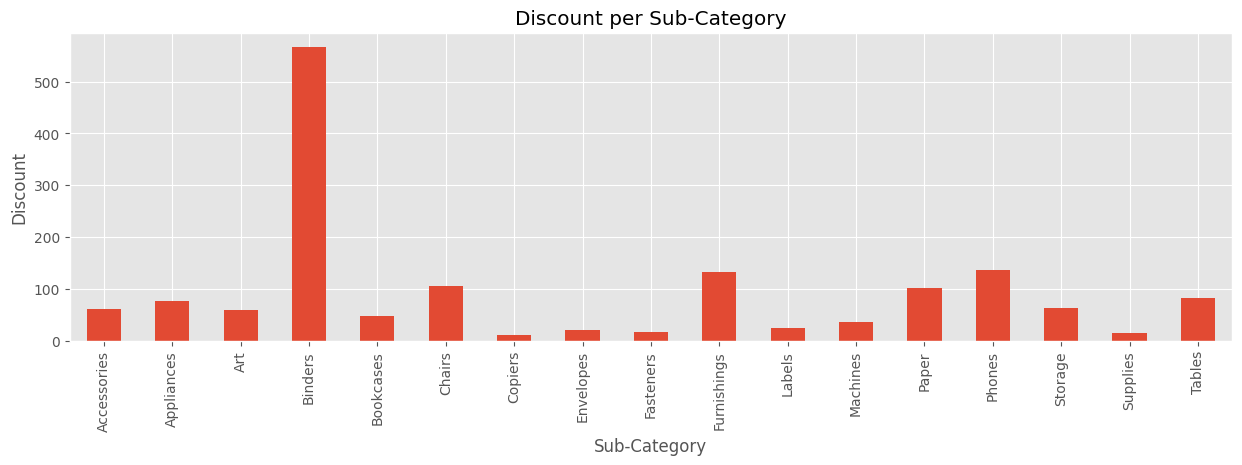

In [22]:
Discount_per_Sub_Category = df.groupby('Sub-Category')['Discount'].sum()
cx=Discount_per_Sub_Category.plot(kind='bar',title='Discount per Sub-Category',figsize=(15,4))
cx.set_ylabel('Discount')
plt.show()

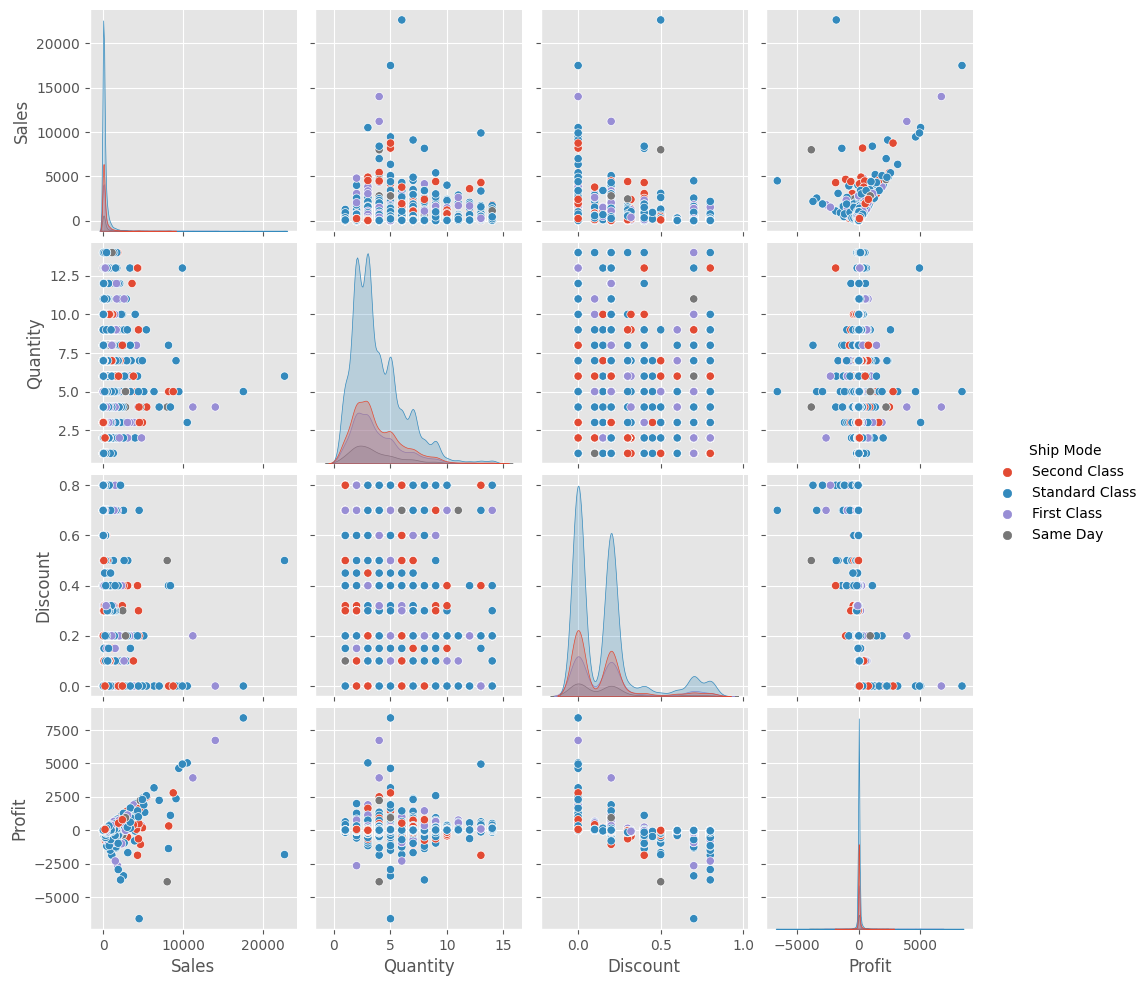

In [23]:
sns.pairplot(df,vars=['Sales','Quantity','Discount', 'Profit'],hue='Ship Mode')
plt.show()

In [24]:
df_corr = df[['Sales','Quantity','Discount', 'Profit']].corr()
df_corr

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200722,-0.028311,0.479067
Quantity,0.200722,1.000000,0.008678,0.066211
Discount,-0.028311,0.008678,1.000000,-0.219662
Profit,0.479067,0.066211,-0.219662,1.000000


<Axes: >

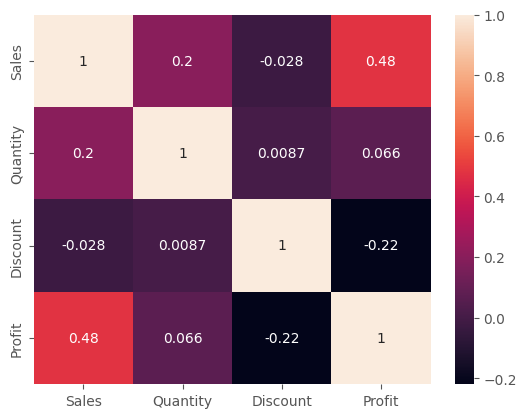

In [25]:
sns.heatmap(df_corr,annot=True)